<a href="https://colab.research.google.com/github/manabtikadar/my_project/blob/main/Breast_Cancer_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploded = files.upload()

Saving data.csv to data.csv


In [4]:
dataset = pd.read_csv("data.csv")
print(dataset.head)

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
dataset.drop(['Unnamed: 32','id'], axis=1, inplace=True)
dataset.diagnosis = [1 if each == "M" else 0 for each in dataset.diagnosis]
print(dataset.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

In [7]:
y = dataset.diagnosis.values
x_data = dataset.drop(['diagnosis'], axis=1)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.15, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (483, 30)
X_test shape: (86, 30)
y_train shape: (483,)
y_test shape: (86,)


In [9]:
numerical_dataset = dataset.select_dtypes(include=['float64', 'int64'])
print(numerical_dataset.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

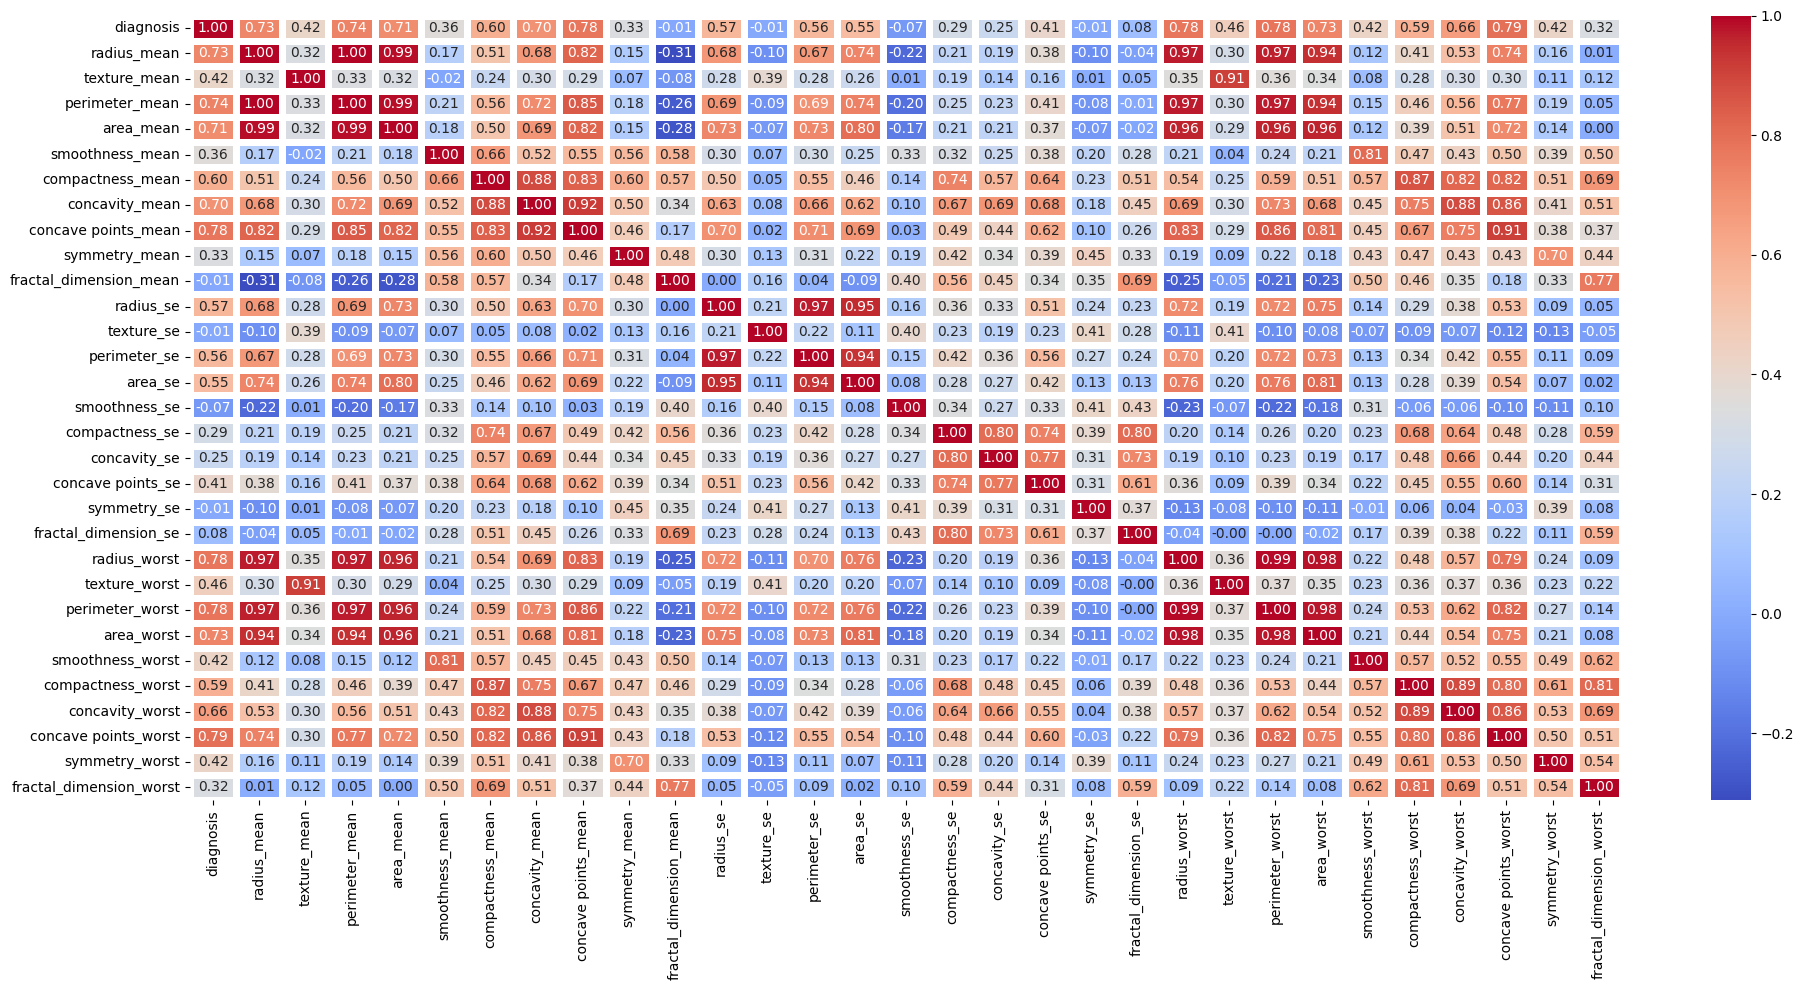

In [10]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(numerical_dataset.corr(), annot=True, cmap='coolwarm',fmt='.2f', linewidths=5)
plt.tight_layout()
plt.show()

In [11]:
new_dataset = dataset.dropna()
print(new_dataset)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

In [12]:
print(X_train)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
9         12.460         24.04           83.97      475.9          0.11860   
468       17.600         23.33          119.00      980.5          0.09289   
382       12.050         22.72           78.75      447.8          0.06935   
322       12.860         13.32           82.82      504.8          0.11340   
84        12.000         15.65           76.95      443.3          0.09723   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     compactness_mean  concavity_mean  concave points_mean  sym

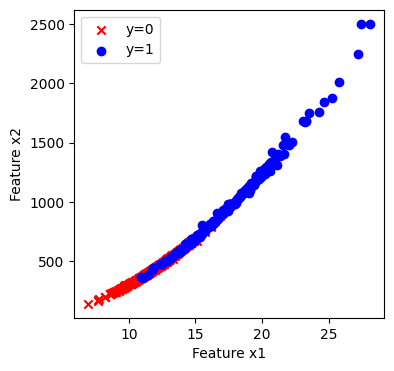

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.scatter(x_data[y == 0]['radius_mean'], x_data[y == 0]['area_mean'], marker='x', color='red', label='y=0')
plt.scatter(x_data[y == 1]['radius_mean'], x_data[y == 1]['area_mean'], marker='o', color='blue', label='y=1')

plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.show()

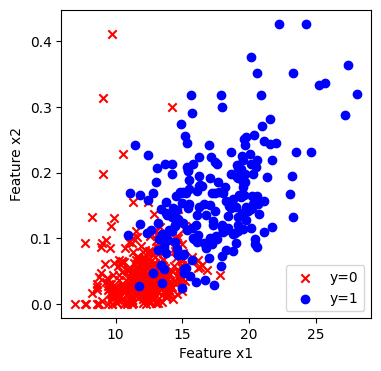

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.scatter(x_data[y == 0]['radius_mean'], x_data[y == 0]['concavity_mean'], marker='x', color='red', label='y=0')
plt.scatter(x_data[y == 1]['radius_mean'], x_data[y == 1]['concavity_mean'], marker='o', color='blue', label='y=1')

plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.show()

In [15]:
def zscore_normalization_features(x):
    mu = x.mean(axis=0)
    sigma = x.std(axis=0)
    x_norm = (x - mu)/sigma
    return x_norm,mu,sigma

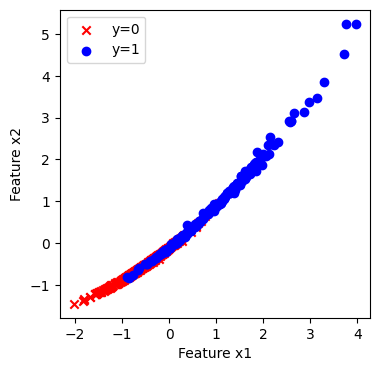

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Assigning the normalized DataFrame to x1_norm
x1_norm, _, _ = zscore_normalization_features(x_data)

# Indexing with x1_norm instead of x1
plt.scatter(x1_norm[y == 0]['radius_mean'], x1_norm[y == 0]['area_mean'], marker='x', color='red', label='y=0')
plt.scatter(x1_norm[y == 1]['radius_mean'], x1_norm[y == 1]['area_mean'], marker='o', color='blue', label='y=1')

plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.show()

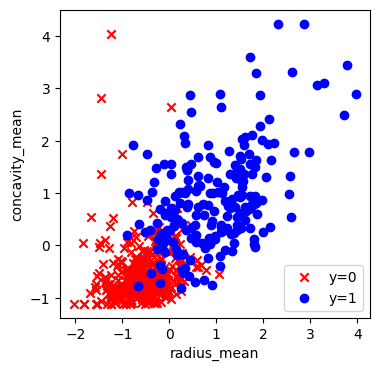

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Assigning the normalized DataFrame to x1_norm
x1_norm, _, _ = zscore_normalization_features(x_data)

# Indexing with x1_norm instead of x1
plt.scatter(x1_norm[y == 0]['radius_mean'], x1_norm[y == 0]['concavity_mean'], marker='x', color='red', label='y=0')
plt.scatter(x1_norm[y == 1]['radius_mean'], x1_norm[y == 1]['concavity_mean'], marker='o', color='blue', label='y=1')


plt.xlabel('radius_mean')
plt.ylabel('concavity_mean')
plt.legend()
plt.show()

In [21]:
def sigmoid(z):
  g = 1/(1+np.exp(-z))
  return g

In [24]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X.iloc[i], w) + b
        # Calling the custom sigmoid function instead of np.sigmoid
        z_i = sigmoid(f_wb_i)
        cost += -y[i] * np.log(z_i) - (1 - y[i]) * np.log(1 - z_i)
    cost = cost / m
    return cost

In [25]:
w_in = np.zeros((X_train.shape[1],))
b_in = 0
cost_result = compute_cost_logistic(X_train, y_train, w_in, b_in)
print(cost_result)

0.6931471805599468


In [31]:
def compute_gradient_logistic(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    for i in range(m):
        # Accessing the row using .iloc to avoid the KeyError
        f_wb_i = sigmoid(np.dot(X.iloc[i], w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            # Accessing the element using .iloc to avoid the KeyError
            dj_dw[j] = dj_dw[j] + err_i * X.iloc[i, j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_db, dj_dw

In [40]:
import copy
import math
def gradient_descent(X,y,w_in,b_in,alpha,num_iters):
  J_hist = []
  w = copy.deepcopy(w_in)
  b = b_in
  theta = []
  for i in range(num_iters):
    dj_db,dj_dw = compute_gradient_logistic(X,y,w,b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db
    if i<100000:
      J_hist.append(compute_cost_logistic(X,y,w,b))
    if i % math.ceil(num_iters/10) == 0:
      print(f"Iteration {i:4}: Cost {J_hist[-1]}   ")
  theta = [b,w]
  return w,b,J_hist,theta

In [127]:
w_temp = np.zeros_like(X_train.iloc[0])
b_temp = 0.0
alpha = 0.00001
iters = 1000
w_out, b_out, _ ,_= gradient_descent(X_train, y_train, w_temp, b_temp, alpha, iters)

Iteration    0: Cost 0.757720350536897   
Iteration  100: Cost 0.5238479425888395   
Iteration  200: Cost 0.37065117990267576   
Iteration  300: Cost 0.3399940461638275   
Iteration  400: Cost 0.31846989161265205   
Iteration  500: Cost 0.3027736753329264   
Iteration  600: Cost 0.2909519876676415   
Iteration  700: Cost 0.2817563473197558   
Iteration  800: Cost 0.2743964188172542   
Iteration  900: Cost 0.26836590785304754   


In [128]:
def prediction(X):
  m,n = X.shape
  p = np.zeros(m)
  for i in range(m):
    f_wb_i = sigmoid(np.dot(X.iloc[i], w_out) + b_out)
    p[i] = f_wb_i >= 0.5
  return p

In [129]:
print(X_train)
print(y_test)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
9         12.460         24.04           83.97      475.9          0.11860   
468       17.600         23.33          119.00      980.5          0.09289   
382       12.050         22.72           78.75      447.8          0.06935   
322       12.860         13.32           82.82      504.8          0.11340   
84        12.000         15.65           76.95      443.3          0.09723   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     compactness_mean  concavity_mean  concave points_mean  sym

In [130]:
print(prediction(X_test))

[0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1.]


In [131]:
print(prediction(X_train))
print(X_train.mean().to_numpy())
means_array = X_train.mean().to_numpy()
trimmed_array = means_array[2:]

[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.

In [132]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a meshgrid for plotting
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
print(x_min, x_max)
print(y_min, y_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
print(f"xx = {xx}, xx_shape = {xx.shape}")
print(f"yy = {yy}, yy_shape = {yy.shape}")

6.691 29.11
8.71 40.28
xx = [[ 6.691  6.791  6.891 ... 28.891 28.991 29.091]
 [ 6.691  6.791  6.891 ... 28.891 28.991 29.091]
 [ 6.691  6.791  6.891 ... 28.891 28.991 29.091]
 ...
 [ 6.691  6.791  6.891 ... 28.891 28.991 29.091]
 [ 6.691  6.791  6.891 ... 28.891 28.991 29.091]
 [ 6.691  6.791  6.891 ... 28.891 28.991 29.091]], xx_shape = (316, 225)
yy = [[ 8.71  8.71  8.71 ...  8.71  8.71  8.71]
 [ 8.81  8.81  8.81 ...  8.81  8.81  8.81]
 [ 8.91  8.91  8.91 ...  8.91  8.91  8.91]
 ...
 [40.01 40.01 40.01 ... 40.01 40.01 40.01]
 [40.11 40.11 40.11 ... 40.11 40.11 40.11]
 [40.21 40.21 40.21 ... 40.21 40.21 40.21]], yy_shape = (316, 225)


In [133]:
# Make predictions for each point in the meshgrid
# Add bias term to meshgrid (1s column)

# Assuming X_train has 30 features
num_features = X_train.shape[1]

# Reshape xx and yy to have the correct number of features
xx_reshaped = xx.ravel().reshape(-1, 1)
yy_reshaped = yy.ravel().reshape(-1, 1)

print(xx_reshaped)
print(yy_reshaped)
# Create an array of zeros with the correct number of features
zeros_array = np.zeros((xx_reshaped.shape[0], num_features-2))
replicated_array = np.tile(trimmed_array, (xx_reshaped.shape[0], 1))
print(replicated_array.shape)
# Concatenate to create grid_points with the correct number of features
grid_points = np.c_[np.ones((xx_reshaped.shape[0], 1)), xx_reshaped, yy_reshaped,replicated_array ]
print(grid_points)
theta = np.concatenate( ([b_out],w_out))
print(theta.shape)
# Predict probabilities using the learned model (theta)
predictions = sigmoid(grid_points.dot(theta))

print(predictions)
# Reshape predictions to match the shape of the meshgrid
Z = predictions.reshape(xx.shape)

[[ 6.691]
 [ 6.791]
 [ 6.891]
 ...
 [28.891]
 [28.991]
 [29.091]]
[[ 8.71]
 [ 8.71]
 [ 8.71]
 ...
 [40.21]
 [40.21]
 [40.21]]
(71100, 28)
[[ 1.          6.691       8.71       ...  0.11454178  0.29009048
   0.08401079]
 [ 1.          6.791       8.71       ...  0.11454178  0.29009048
   0.08401079]
 [ 1.          6.891       8.71       ...  0.11454178  0.29009048
   0.08401079]
 ...
 [ 1.         28.891      40.21       ...  0.11454178  0.29009048
   0.08401079]
 [ 1.         28.991      40.21       ...  0.11454178  0.29009048
   0.08401079]
 [ 1.         29.091      40.21       ...  0.11454178  0.29009048
   0.08401079]]
(31,)
[0.68602972 0.68592196 0.68581418 ... 0.6005075  0.60038748 0.60026745]


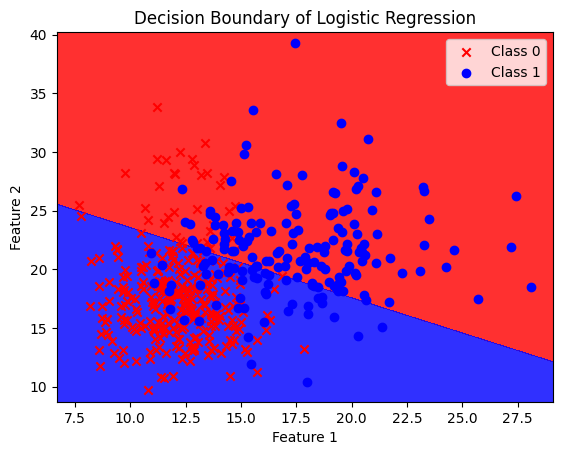

In [137]:
# Plot the decision boundary
plt.contourf(xx, yy, Z, levels=[0, 0.655, 1], cmap=ListedColormap(['red', 'blue']), alpha=0.81)
# Added levels=[0, 0.5, 1] to create filled contours with two regions

# Scatter the data points
# Corrected indexing to use boolean array on y_train, which matches X_train in size
plt.scatter(X_train.iloc[y_train == 0, 0], X_train.iloc[y_train == 0, 1], color='red', marker='x', label='Class 0')
plt.scatter(X_train.iloc[y_train == 1, 0], X_train.iloc[y_train == 1, 1], color='blue', marker='o', label='Class 1')

plt.title('Decision Boundary of Logistic Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

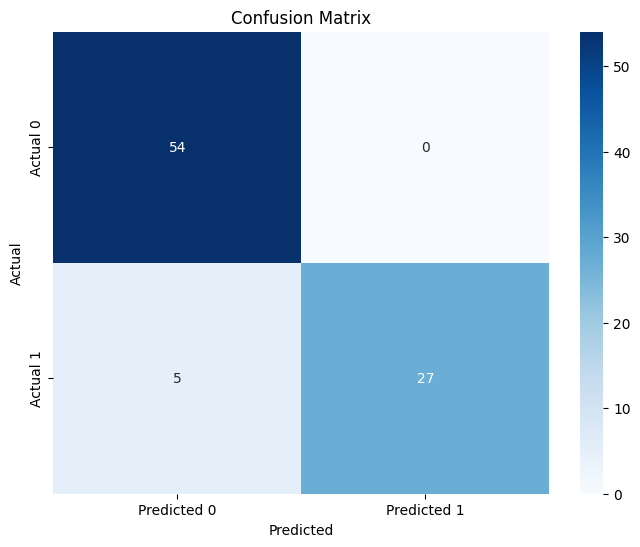

In [138]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = prediction(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

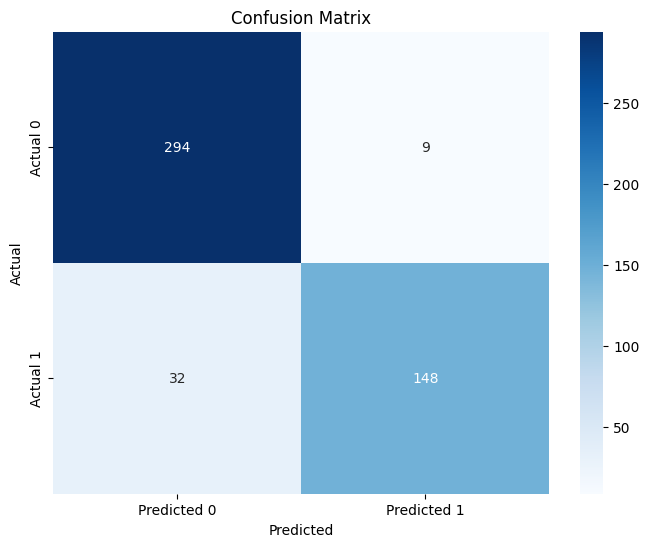

In [140]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_train = prediction(X_train)


conf_matrix = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [141]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 1.00
Recall: 0.84
F1 Score: 0.92


In [143]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred_train)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 91.51%


In [142]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 94.19%
